# Importing Required Libraries

In [143]:
import numpy as np
import pandas as pd
# !pip install emoji
import emoji

import warnings

warnings.filterwarnings('ignore')

# Loading the data

In [101]:
df_badminton = pd.read_csv()

In [102]:
df_badminton

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [103]:
df_badminton.shape

(8518, 8)

In [104]:
df_badminton.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [105]:
df_badminton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [106]:
df_badminton["Review"] = df_badminton['Review Title'] + '. ' + df_badminton['Review text']

In [107]:
df_badminton["Ratings"].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [108]:
df_badminton["Ratings"].value_counts(normalize=True)

5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: Ratings, dtype: float64

<AxesSubplot:>

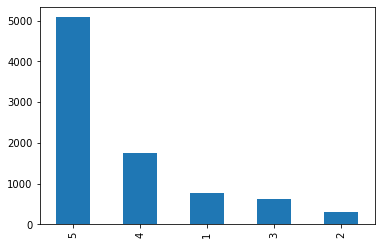

In [109]:
df_badminton["Ratings"].value_counts().plot.bar()

In [110]:
# Modifying the class labels 
df_badminton['Review_Type'] = df_badminton['Ratings'].apply(lambda x: 'Negative' if (x<=3) else 'Positive')

In [111]:
# Final useful columns 
df = df_badminton[["Review", "Review_Type"]]
df.head()

,Review,Review_Type
0,"Nice product. Nice product, good quality, but ...",Positive
1,Don't waste your money. They didn't supplied Y...,Negative
2,Did not meet expectations. Worst product. Dama...,Negative
3,"Fair. Quite O. K. , but nowadays the quality ...",Negative
4,Over priced. Over pricedJust â?¹620 ..from ret...,Negative


In [112]:
# Checking for the null values
df.isnull().sum()

Review         10
Review_Type     0
dtype: int64

In [115]:
# Drop the null value records
df.dropna(inplace=True)

In [116]:
df.isnull().sum()

Review         0
Review_Type    0
dtype: int64

In [117]:
df.shape

(8508, 2)

In [118]:
# Checking for imbalance data
df["Review_Type"].value_counts()

Positive    6822
Negative    1686
Name: Review_Type, dtype: int64

# Identifying input and output

In [119]:
X = df[["Review"]]
y = df["Review_Type"]

# Splitting into train and test data

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [121]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [122]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [123]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

# Data Preprocessing on Train Data

In [128]:
def text_preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()
    
    sentence = emoji.demojize(sentence).replace(':','')
    
    sentence = re.sub(r'<[^>]+','',sentence)
    sentence = re.sub(r'[^a-zA-Z0-9 ]','',sentence)
    sentence = re.sub(r'[0-9]','',sentence)
    
    # tokenize into words
    tokens = sentence.split()

    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [136]:
temp_df = X_train['Review'].apply(lambda x: text_preprocess(x, 'lemma'))

temp_df.head()

,0,1
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10


In [137]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10
...,...,...
5734,pretty good genuine orginal productread,5
5191,delightful badminton shuttle goodread,4
5390,wonderful best quality shuttle read,5
860,highly recommended nice happyread,4


In [139]:
X_train_clean = pd.DataFrame(temp_df)
X_train_clean

,clean_text_lemma,Text_length_lemma
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10
...,...,...
5734,pretty good genuine orginal productread,5
5191,delightful badminton shuttle goodread,4
5390,wonderful best quality shuttle read,5
860,highly recommended nice happyread,4


# Data preprocessing on test data

In [140]:
temp_df = X_test['Review'].apply(lambda x: text_preprocess(x, 'lemma'))

temp_df.head()

,0,1
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4


In [141]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4
...,...,...
2516,nice product original oneread,4
5309,perfect product nice product indoors suitable ...,8
2183,simply awesome supperread,3
4362,excellent goodread,2


In [142]:
X_test_clean = pd.DataFrame(temp_df)
X_test_clean

,clean_text_lemma,Text_length_lemma
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4
...,...,...
2516,nice product original oneread,4
5309,perfect product nice product indoors suitable ...,8
2183,simply awesome supperread,3
4362,excellent goodread,2


# Pipeline for Optimal Workflow

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
from joblib import Memory
from sklearn.metrics import f1_score

In [176]:
# Define pipeline components
tfidf_vectorizer = TfidfVectorizer()
random_forest = RandomForestClassifier()
svm_classifier = SVC()

# Create pipelines
pipeline_rf = Pipeline([('tfidf', tfidf_vectorizer), ('clf', random_forest)])
pipeline_svm = Pipeline([('tfidf', tfidf_vectorizer), ('clf', svm_classifier)])

# Define hyperparameters for tuning
param_grid_rf = {
    'tfidf__max_features': [5000, 10000, None],
    'clf__n_estimators': [50, 100, 200]
}

param_grid_svm = {
    'tfidf__max_features': [5000, 10000, None],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

In [178]:
# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=4, verbose=1)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=4, verbose=1)

# Fit the models
grid_search_rf.fit(X_train_clean['clean_text_lemma'], y_train)
grid_search_svm.fit(X_train_clean['clean_text_lemma'], y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__kernel': ['linear', 'rbf'],
                         'tfidf__max_features': [5000, 10000, None]},
             verbose=1)

In [202]:
# Print best parameters for each model
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for Random Forest: {'clf__n_estimators': 100, 'tfidf__max_features': 10000}
Best parameters for SVM: {'clf__C': 1, 'clf__kernel': 'rbf', 'tfidf__max_features': 5000}


In [203]:
# Evaluate models
rf_predictions = grid_search_rf.predict(X_test_clean['clean_text_lemma'])
print("Random Forest F1 Score:")
print(f1_score(y_test, rf_predictions, pos_label='Positive'))

svm_predictions = grid_search_svm.predict(X_test_clean['clean_text_lemma'])
print("SVM F1 Score:")
print(f1_score(y_test, svm_predictions, pos_label='Positive'))

Random Forest F1 Score:
0.9246119733924612
SVM F1 Score:
0.928787462194116


In [185]:
# Define pipeline components
tfidf_vectorizer = TfidfVectorizer()
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()


# Create pipelines
pipeline_lr = Pipeline([('tfidf', tfidf_vectorizer), ('clf', logistic_regression)])
pipeline_dt = Pipeline([('tfidf', tfidf_vectorizer), ('clf', decision_tree)])
pipeline_nb = Pipeline([('tfidf', tfidf_vectorizer), ('clf', naive_bayes)])

# Define hyperparameters for tuning
param_grid_lr = {
    'tfidf__max_features': [5000, 10000, None],
    'clf__C': [0.1, 1, 10]
}

param_grid_dt = {
    'tfidf__max_features': [5000, 10000, None],
    'clf__max_depth': [None, 10, 20, 30]
}

param_grid_nb = {
    'tfidf__max_features': [5000, 10000, None],
    'clf__alpha': [0.1, 1, 10]
}

In [186]:
# GridSearchCV instantiation for each pipeline
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, n_jobs=-1)
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, n_jobs=-1)
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, n_jobs=-1)

In [187]:
# Fit the models
grid_search_lr.fit(X_train_clean['clean_text_lemma'], y_train)
grid_search_dt.fit(X_train_clean['clean_text_lemma'], y_train)
grid_search_nb.fit(X_train_clean['clean_text_lemma'], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 1, 10],
                         'tfidf__max_features': [5000, 10000, None]})

In [192]:
# Print best parameters for each model
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for NB:", grid_search_nb.best_params_)

Best parameters for Logistic Regression: {'clf__C': 10, 'tfidf__max_features': 5000}
Best parameters for Random Forest: {'clf__n_estimators': 100, 'tfidf__max_features': 10000}
Best parameters for NB: {'clf__alpha': 0.1, 'tfidf__max_features': 5000}


# Evaluation

In [193]:
# Evaluate models
lr_predictions = grid_search_lr.predict(X_test_clean['clean_text_lemma'])
print("Logistic Regression F1 Score:")
print(f1_score(y_test, lr_predictions, pos_label='Positive'))

dt_predictions = grid_search_dt.predict(X_test_clean['clean_text_lemma'])
print("Decision Tree F1 Score:")
print(f1_score(y_test, dt_predictions, pos_label='Positive'))

nb_predictions = grid_search_nb.predict(X_test_clean['clean_text_lemma'])
print("Naive Bayes F1 Score:")
print(f1_score(y_test, nb_predictions, pos_label='Positive'))

Logistic Regression F1 Score:
0.9254312743461325
Decision Tree F1 Score:
0.921161825726141
Naive Bayes F1 Score:
0.9214167127836193


# Prediction on unseen Data

In [194]:
# Save the best models
joblib.dump(grid_search_lr.best_estimator_, 'lr_model.pkl')
joblib.dump(grid_search_rf.best_estimator_, 'dt_model.pkl')
joblib.dump(grid_search_svm.best_estimator_, 'nb_model.pkl')

['nb_model.pkl']

In [200]:
# Loading the model
model = joblib.load('lr_model.pkl')

In [201]:
new_data = [
    "The product is really good."
]

new_data_clean = [text_preprocess(text, 'lemma') for text in new_data]

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: ['Positive']
